In [1]:
from diffusers import StableDiffusionPipeline, UNet2DConditionModel, StableDiffusionXLPipeline
import torch
torch.set_grad_enabled(False)

In [7]:
dpo_unet = UNet2DConditionModel.from_pretrained(
                            #  'mhdang/dpo-sd1.5-text2image-v1',
                            '/workspace/home/huayu/git/DiffusionDPO/tmp-sd15-test/checkpoint-500',
                            # alternatively use local ckptdir (*/checkpoint-n/)
                            subfolder='unet',
                            torch_dtype=torch.float16
).to('cuda')

OSError: We couldn't connect to 'https://huggingface.co' to load this model, couldn't find it in the cached files and it looks like /workspace/home/huayu/git/DiffusionDPO/tmp-sd15-test/checkpoint-500 is not the path to a directory containing a config.json file.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/diffusers/installation#offline-mode'.

In [3]:
# pretrained_model_name = "CompVis/stable-diffusion-v1-4"
pretrained_model_name = "/workspace/home/huayu/stable-diffusion-v1-5"
# pretrained_model_name = "stabilityai/stable-diffusion-xl-base-1.0"
gs = (5 if 'stable-diffusion-xl' in pretrained_model_name else 7.5)

In [4]:
if 'stable-diffusion-xl' in pretrained_model_name:
    pipe = StableDiffusionXLPipeline.from_pretrained(
        pretrained_model_name, torch_dtype=torch.float16,
        variant="fp16", use_safetensors=True
    ).to("cuda")
else:
    pipe = StableDiffusionPipeline.from_pretrained(pretrained_model_name,
                                                   torch_dtype=torch.float16)
pipe = pipe.to('cuda')
pipe.safety_checker = None # Trigger-happy, blacks out >50% of "robot tiger"



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [8]:
example_prompts = [
    "A pile of sand swirling in the wind forming the shape of a dancer",
    "A giant dinosaur frozen into a glacier and recently discovered by scientists, cinematic still",
    "a smiling beautiful sorceress with long dark hair and closed eyes wearing a dark top surrounded by glowing fire sparks at night, magical light fog, deep focus+closeup, hyper-realistic, volumetric lighting, dramatic lighting, beautiful composition, intricate details, instagram, trending, photograph, film grain and noise, 8K, cinematic, post-production",
    "A purple raven flying over big sur, light fog, deep focus+closeup, hyper-realistic, volumetric lighting, dramatic lighting, beautiful composition, intricate details, instagram, trending, photograph, film grain and noise, 8K, cinematic, post-production",
    "a smiling beautiful sorceress wearing a modest high necked blue suit surrounded by swirling rainbow aurora, hyper-realistic, cinematic, post-production",
    "Anthro humanoid turtle skydiving wearing goggles, gopro footage",
    "A man in a suit surfing in a river",
    "photo of a zebra dressed suit and tie sitting at a table in a bar with a bar stools, award winning photography",
    "A typhoon in a tea cup, digital render",
    "A cute puppy leading a session of the United Nations, newspaper photography",
    "Worm eye view of rocketship",
    "Glass spheres in the desert, refraction render",
    "anthropmorphic coffee bean drinking coffee",
    "A baby kangaroo in a trenchcoat",
    "A towering hurricane of rainbow colors towering over a city, cinematic digital art",
    "A redwood tree rising up out of the ocean",
]
generator = torch.Generator(device='cuda')
generator = generator.manual_seed(0)
im=pipe(prompt=example_prompts, generator=generator, guidance_scale=7.5)

  0%|          | 0/50 [00:00<?, ?it/s]

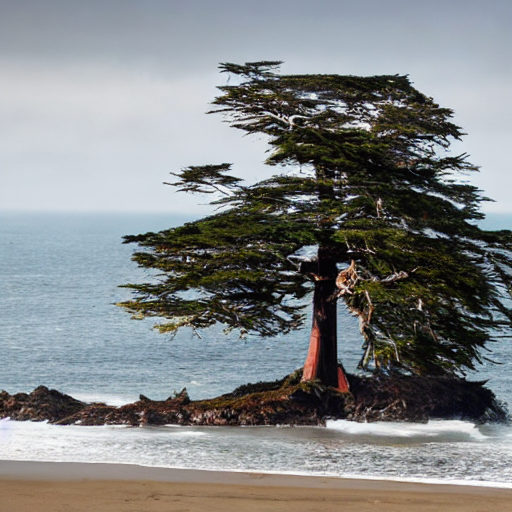

In [21]:
display(im.images[-1])


In [8]:
# Can do clip_utils, aes_utils, hps_utils
from utils.pickscore_utils import Selector
# Score generations automatically w/ reward model
ps_selector = Selector('cuda')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /workspace/home/huayu/miniconda3/envs/llm/lib/python3.8/site-packages/urllib3/connection.py:203  │
│ in _new_conn                                                                                     │
│                                                                                                  │
│   200 │   │   :return: New socket connection.                                                    │
│   201 │   │   """                                                                                │
│   202 │   │   try:                                                                               │
│ ❱ 203 │   │   │   sock = connection.create_connection(                                           │
│   204 │   │   │   │   (self._dns_host, self.port),                                               │
│   205 │   │   │   │   self.timeout,                                                              │
│   206 │   │   │   │   source_address=self.source_address,                                        │
│                                                                                                  │
│ /workspace/home/huayu/miniconda3/envs/llm/lib/python3.8/site-packages/urllib3/util/connection.py │
│ :85 in create_connection                                                                         │
│                                                                                                  │
│    82 │                                                                                          │
│    83 │   if err is not None:                                                                    │
│    84 │   │   try:                                                                               │
│ ❱  85 │   │   │   raise err                                                                      │
│    86 │   │   finally:                                                                           │
│    87 │   │   │   # Break explicitly a reference cycle                                           │
│    88 │   │   │   err = None                                                                     │
│                                                                                                  │
│ /workspace/home/huayu/miniconda3/envs/llm/lib/python3.8/site-packages/urllib3/util/connection.py │
│ :73 in create_connection                                                                         │
│                                                                                                  │
│    70 │   │   │   │   sock.settimeout(timeout)                                                   │
│    71 │   │   │   if source_address:                                                             │
│    72 │   │   │   │   sock.bind(source_address)                                                  │
│ ❱  73 │   │   │   sock.connect(sa)                                                               │
│    74 │   │   │   # Break explicitly a reference cycle                                           │
│    75 │   │   │   err = None                                                                     │
│    76 │   │   │   return sock                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
timeout: timed out

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /workspace/home/huayu/miniconda3/envs/llm/lib/python3.8/site-packages/urllib3/connectionpool.py: │
│ 791 in urlopen                                                                                   │
│                                                                                                  │
│    788 │   │   │   response_conn = conn if not release_conn else None 

In [10]:
unets = [pipe.unet, dpo_unet]
names = ["Orig. SDXL", "DPO SDXL"]


In [11]:
def gen(prompt, seed=0, run_baseline=True):
    ims = []
    generator = torch.Generator(device='cuda')
    for unet_i in ([0, 1] if run_baseline else [1]):
        print(f"Prompt: {prompt}\nSeed: {seed}\n{names[unet_i]}")
        pipe.unet = unets[unet_i]
        generator = generator.manual_seed(seed)
        
        im = pipe(prompt=prompt, generator=generator, guidance_scale=gs).images[0]
        display(im)
        ims.append(im)
    return ims

In [5]:



for p in example_prompts:
    ims = gen(p) # could save these if desired    
    # scores = ps_selector.score(ims, p)
    # print(scores)

NameError: name 'gen' is not defined

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

In [ ]:
# to get partiprompts captions
from datasets import load_dataset
dataset = load_dataset("nateraw/parti-prompts")
print(dataset['train']['Prompt'])